In [1]:
import pandas as pd 

In [2]:
dataset = pd.read_csv('data/gemstone.csv')
df = dataset.copy()

In [3]:
df.isnull().sum()
# Observation: No missing values found in the dataset

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
## Id is not important. Drop it 

In [6]:
df.drop(labels = ['id'], axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
## Checking for duplicated records

In [8]:
df.duplicated().sum()
# use df.drop_duplicates() to drop duplicated values

0

In [9]:
# Segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [11]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [12]:
df['cut'].nunique()

5

In [13]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [14]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [15]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [16]:
# Plotting all numerical variables

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt 
import scienceplots 
plt.style.use(['science', 'notebook', 'grid', 'dark_background'])
plt.figure(figsize = (10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

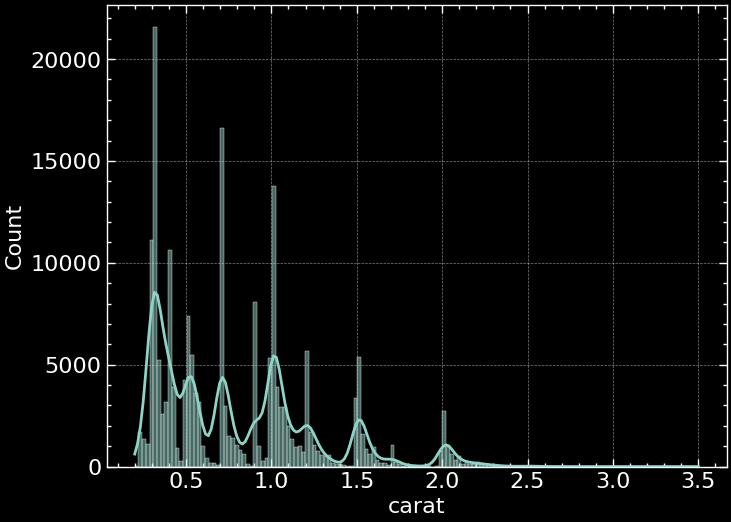

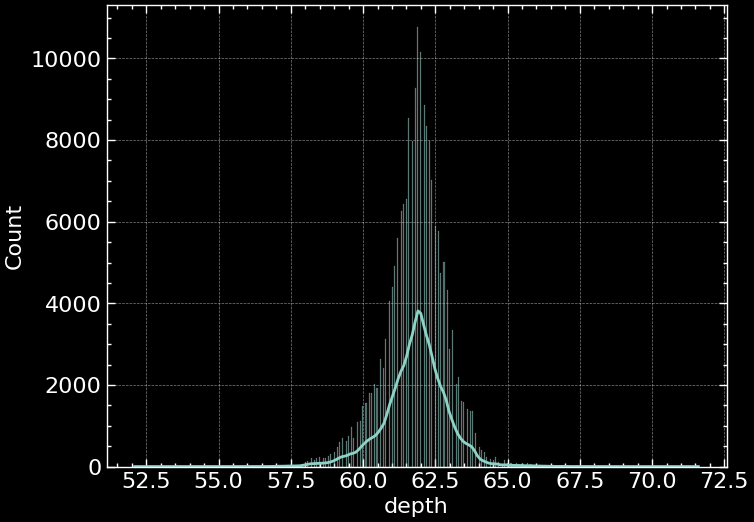

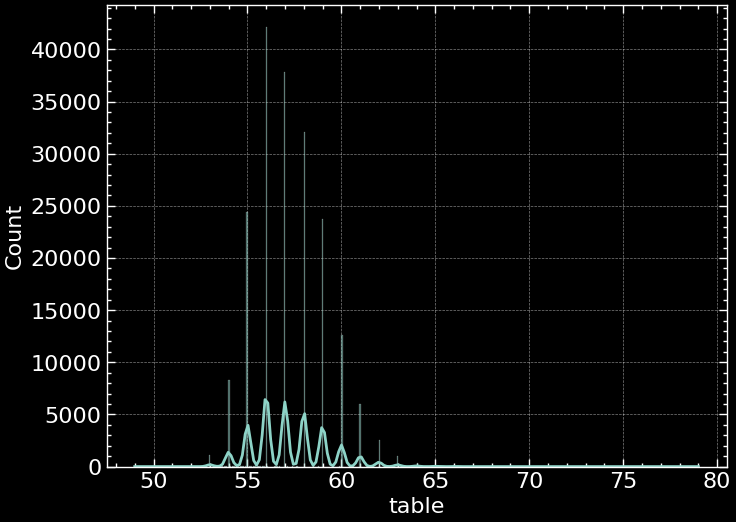

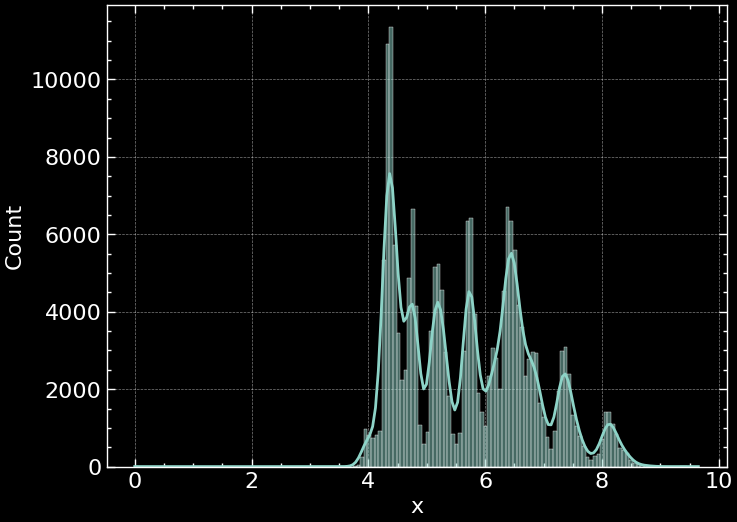

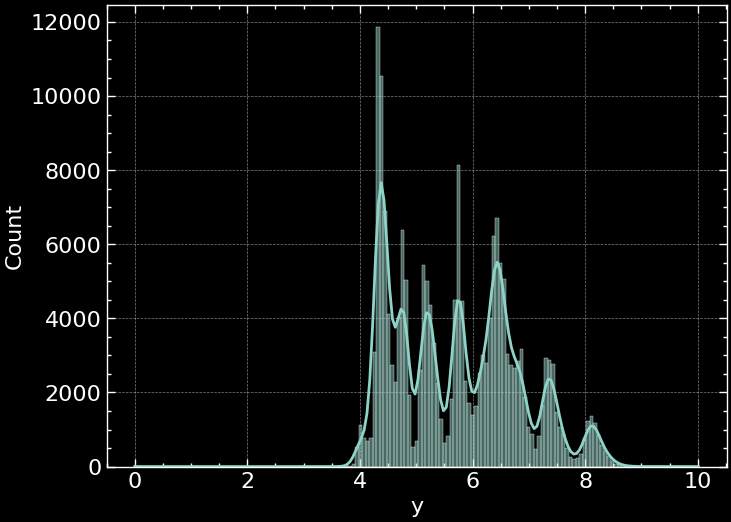

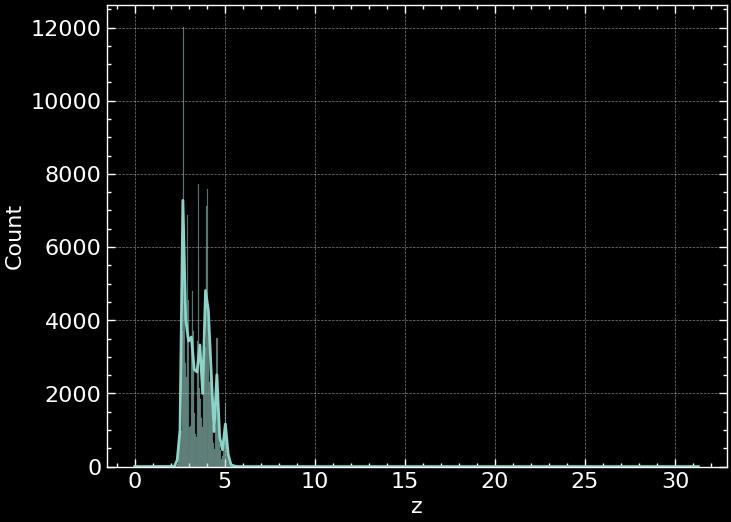

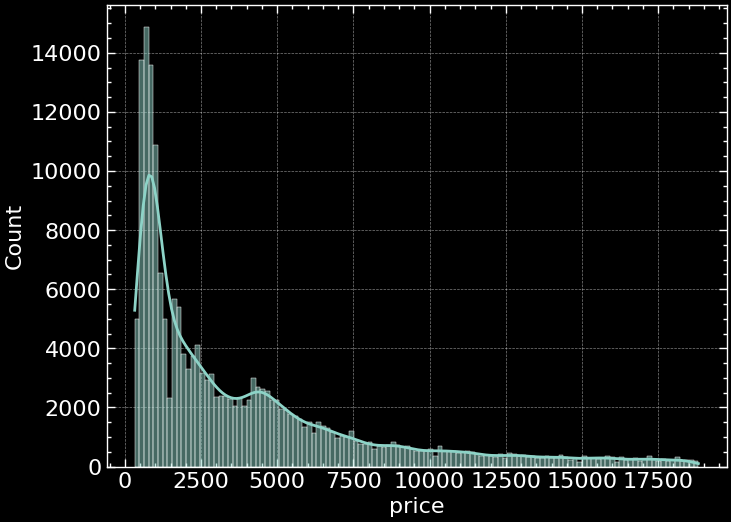

In [18]:
x =0 
for i in numerical_columns: 
    sns.histplot(data = df, x = i, kde = True)
    print('\n')
    plt.show()

In [19]:
# Assignment to do the same for categorical data

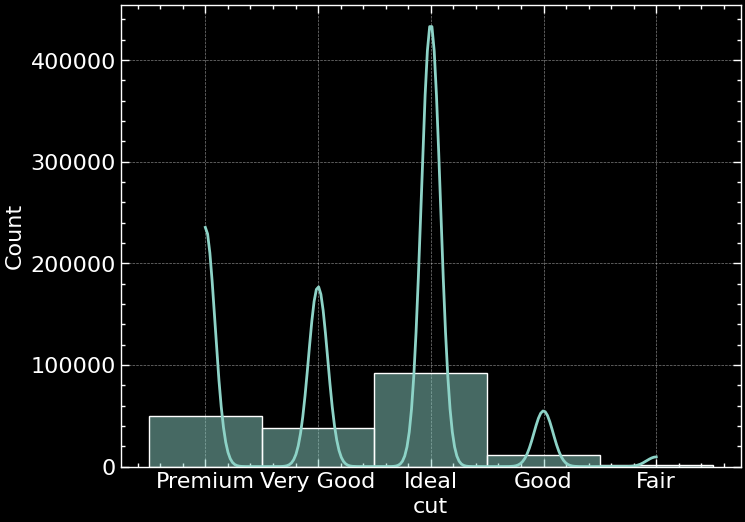

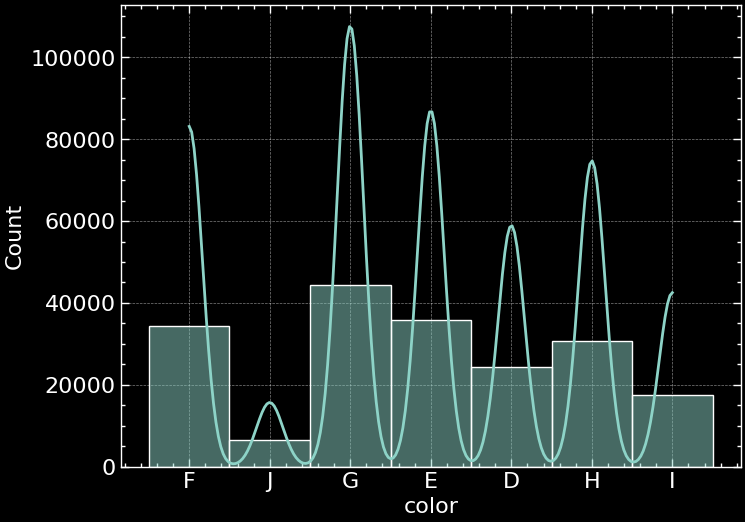

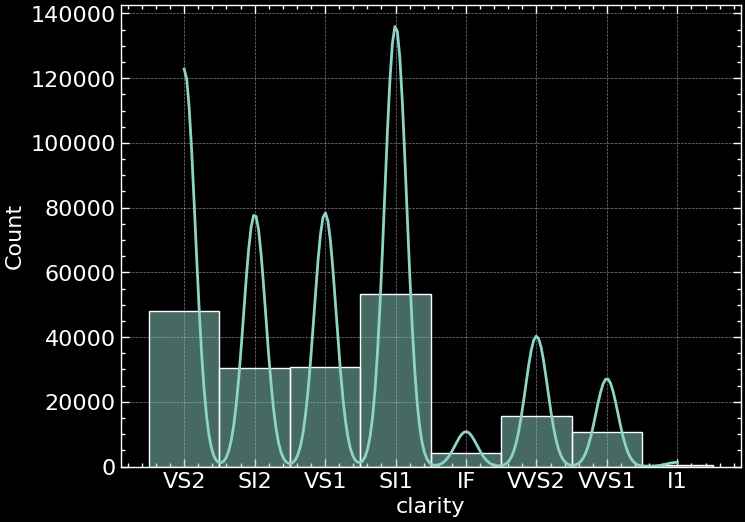

In [20]:
x = 0
for i in categorical_columns: 
    sns.histplot(data = df, x = i, kde = True)
    print("\n")
    plt.show()
  

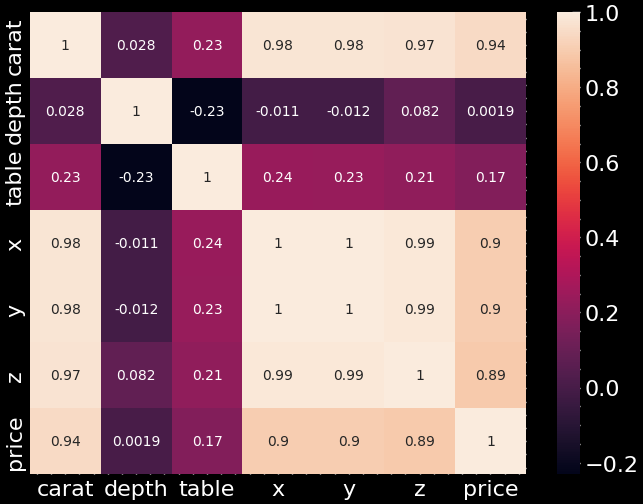

In [21]:
## Correlation
sns.heatmap(df.corr(numeric_only= True), annot = True)
plt.show()

In [23]:
df.drop(labels = ['x', 'y', 'z'], axis = 1)

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,681


In [24]:
# Though x, y, and z are correlated, we are not dropping because we need to check overfitting

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


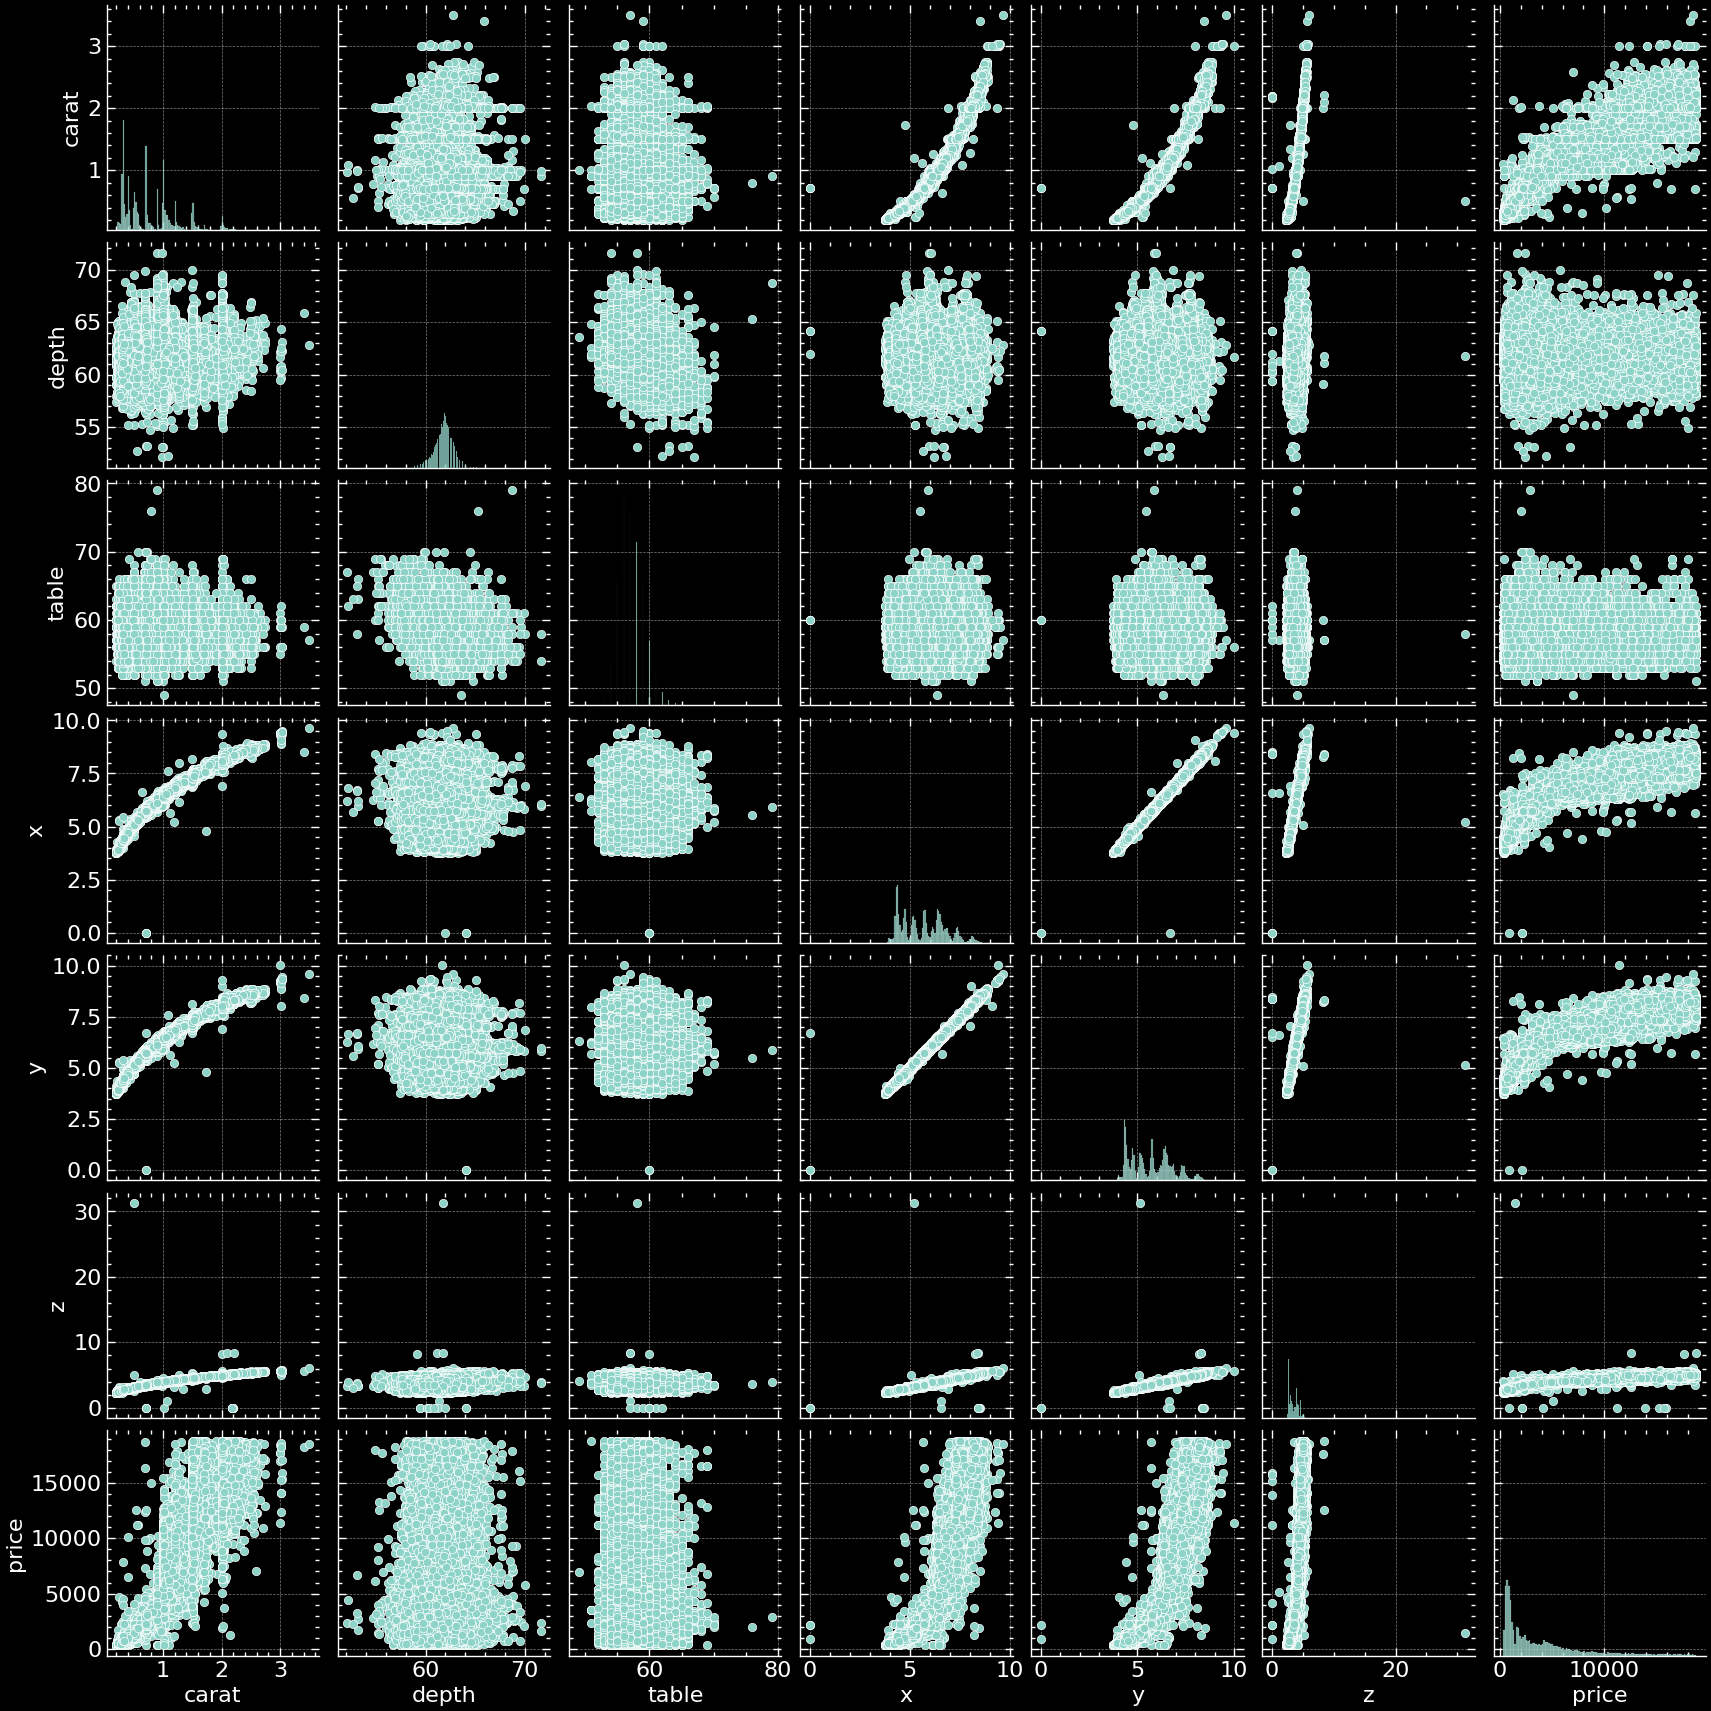

In [26]:
# sns.pairplot(df)

In [27]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [28]:
# This is ordinal data and has to be ranked. 
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

In [29]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [31]:
clarity_map = {"I1": 1,"SI2":2,"SI1": 3, "VS2": 4,"VS1": 5, "VVS2": 6,"VVS1":7, "IF": 8}

In [32]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [34]:
color_map = {"D":1, "E": 2, "F": 3, "G": 4, "H":5, "I":6, "J":7}

In [35]:
# For all the maps, higher the number better the prospects/quality

In [38]:
# .map function is used to assign values to observations. 
df["cut"] = df["cut"].map(cut_map)
df["clarity"] = df['clarity'].map(clarity_map)
df["color"] = df['color'].map(color_map)

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
